# Kaggle Project
## Dataset

#### URL: https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset

#### Task
StreetEasy is New York City’s leading real estate marketplace. You will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan.

#### Datasets
It has the following columns:

- rental_id
- rent
- bedrooms
- bathrooms
- size_sqft
- min_to_subway
- floor
- building_age_yrs
- no_fee
- has_roofdeck
- has_washer_dryer
- has_doorman
- has_elevator
- has_dishwasher
- has_patio
- has_gym
- neighborhood
- borough

#### Features(x): bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
#### Targets(y): rent

## Data preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('./Downloads/manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [2]:
df = df.drop(['neighborhood','borough','rental_id'],axis = 1)

In [3]:
print(df.columns)
print(len(df.columns))
print(len(df))

Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')
15
3539


## Model Construction

### Split Data: Train data,Test Data

In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym']] #주택임대료에 영향을 주는 값

y = df[['rent']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2)
#train data:test data = 8:2 비율로 나눔

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 14) (708, 14) (2831, 1) (708, 1)


## Train Model & Select Model

### ● Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression(fit_intercept = True) #선형회귀
mlr.fit(x_train,y_train)

LinearRegression()

In [7]:
my_apartment = [[1,1,620,16,1,98,1,0,1,0,0,1,1,0]] #14개의 x값(임대료에 영향을 주는 값) 대입
my_predict= mlr.predict(my_apartment) #LinearRegression을 통한 주택 임대료 예측
my_predict #위와같은 x값을 대입했을 때 주택임대료 값

C:\Users\ssmj9\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2282.04654505]])

In [8]:
y_predict = mlr.predict(x_test) #x_test를 넣어 예측한 값들을 y_predict이라고 가정

#### Linear Regression Graph

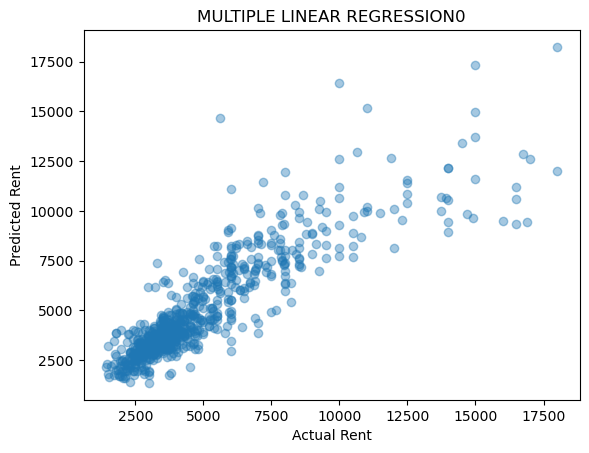

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict,alpha = 0.4)
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION0')# 다중선형회귀
plt.show() #그래프그려줌

### ● DecisionTree

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
mdt = DecisionTreeRegressor(random_state=0,max_depth=2)

mdt.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=2, random_state=0)

In [12]:
my_apartment = [[1,1,620,16,1,98,1,0,1,0,0,1,1,0]] #14개의 x값(임대료에 영향을 주는 값) 대입
my_predict= mdt.predict(my_apartment) #DecisionTree를 통한 주택 임대료 예측
my_predict #위와같은 x값을 대입했을 때 주택임대료 값

C:\Users\ssmj9\anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3471.94409222])

## Performance

### Set Loss Function

In [13]:
def mse_loss(pre, y): #손실함수 mse함수 정의
    return((pre-y)**2).mean()

In [14]:
mlr.fit(x,y)
pre = mlr.predict(x)

loss_value = mse_loss(pre,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(loss_value) # Linear Regression의 손실함수 결과값

rent    2.207072e+06
dtype: float64


In [15]:
mdt.fit(x,y)
pre = mdt.predict(x)

pre1 = pre.reshape(3539,-1)

loss_value = mse_loss(pre1,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(mdt,loss_value) # Decision Tree의 손실함수 결과값


DecisionTreeRegressor(max_depth=2, random_state=0) rent    2.890416e+06
dtype: float64


The results explains:

linear regression의 손실함수 값은 2.207072e+06이고 decision tree의 손실함수 값은 

2.890416e+06이므로 linear regression이 이 모델에서는 linear regression이 더 적합하

다.

